In [1]:
import numpy as np
import pandas as pd

# Variance, Covariance, and Correlation

## Introduction 

In this lesson, we shall look at how **Variance** of a random variable is used to calculate **Covariance** and **Correlation**, two key measures used in Statistics for finding the relationships between random variables. These measures help us identify the degree to which two sets of data tend to deviate from their expected value (i.e., mean), similarly. Based on these measures, we can identify if two variables are dependent on each other, and to what extent. This lesson will help you develop a conceptual understanding, necessary calculations, and some precautions while using these measures. 

Let's start by a simple example and demonstration to show you what is Correlation and Covariance between two random variables:

We have two random variable Var1 and Var2, and we want to see the relationship between each other

In [36]:
Var1 = np.random.randint(0,5,5)
Var2 = np.random.randint(0,5,5)
Var1.sort()
Var2.sort()
# we calculate the correlation using a library to just demostrate, later we will walk through a formula
#of the correlation
print('Var1:', Var1, 'Var2:', Var2, sep='\n')
print('Correlation between Var1 and Var2 is:',np.correlate(Var1, Var2))
print('Covariance between Var1 and Var2 is:', np.cov(np.stack((Var1,Var2), axis=0))[0][1], sep='\n')

Var1:
[1 2 2 3 4]
Var2:
[0 0 2 4 4]
Correlation between Var1 and Var2 is: [32]
Covariance between Var1 and Var2 is:
2.0


Now for better understanding what these numbers represent lets walk through the lesson.

## Objectives

You will be able to

* Understand and explain data variance and how it relates to Standard Deviation
* Understand and calculate Covariance and Correlation between two random variables
* Visualize and interpret the results of Covariance and Correlation


## What is Standard Deviation
Before we explain the Variance we need to understand **Standard Deviation** of a random variable. Standard Deviation refers to the __expectatoin of the distance of a random variable from its mean__.
let's walk through the example above example:

In [37]:
print('we expect a random variable from Var1 have the distance of:', Var1.std())

we expect a random variable from Var1 have the distance of: 1.019803902718557





## What is Variance ($\sigma^2$)

Now before we talk about covariance, it is imperative that we get some idea around **Variance** of a random variable. Variance refers to the __expectatoin of the squared distance(deviation) of a random variable from its mean__.

>__In other words if we have a set of random variables that they have specific distribution, the next number that that randomly comes from that distribution we expect to have a squared distance from the mean which is equal to variance__.
Continuing the example above example:
Our Var1 set is [2,2,3,4,4]. This a random variable with a distribution. So the next number that comes up from the same distribution we expected to have a squared distance of $\sigma^2$ from the mean.

In [38]:
print('we expect the a random variable from Var1 have the square distance of:', Var1.var())

we expect the a random variable from Var1 have the square distance of: 1.04


#### In other words

> __Variance is a measure used to quantify how much a random variable deviates from its mean value__. 

When we calculate variance, we are essentially asking, "__Given the relationship of all given data points, how much distant from mean do we expect the next data point to be?__"  This "distance" is called the **error term**, and it's what variance is measuring. 

Variance is shown using notatioin $\sigma^2$. Previously, we have seen $\sigma$ as a measure of standard deviation within a given dataset. Remember standard deviation is also a measure of spread of data. __Variance is simply the square of standard deviation (Or we could say standard deviation is is the square root of variance)__. 

### Example Use Case

For example, a simple application of this measure could be associating probabilities with predicted future events in a market research activity, identifying them as "very likely" or "unlikely" etc. Most people are risk averse, in that they wish to minimize the amount of risk they must endure to earn a certain level of expected return. If investors were indifferent to risk, they would not be influenced by the differences between stock A and stock B above, whereas the risk-averse investor would clearly prefer stock A. Therefore, most people want to know the range or dispersion(spread/deviation as we termed it earlier) of possible outcomes, as well as the likelihood of certain outcomes occurring. Variance measure is a great way to find all of the possible values and likelihoods that a random variable can take within a given range defined by the underlying data. 


Consider the following graphs for Conglomo, Inc. and Bilco, Inc. These graphs show the theoretical frequency distributions of the monthly returns for each firm's common stock as though the returns were normally distributed.

<img src="images/var.png" width=400>

Conglomo's distribution of returns is more concentrated than Bilco's, as illustrated by Conglomo's relatively wider bell curve. A more concentrated distribution is defined as having a smaller standard deviation. The distribution curve appears higher, steeper, and narrower because more observations are occurring close to the expected return. Bilco's distribution is rather flat, reflecting that its returns are less concentrated, or more dispersed, than those of Conglomo Inc.

### Interpreting Variance 

A variance value of zero represents that all of the values within a data set are identical, while all variances that are not equal to zero will come in the form of positive numbers. The larger the variance, the more spread in the data set. A large variance means that the numbers in a set are far from the mean and each other. A small variance means that the numbers are closer together in value. 
### How to Calculate Variance? 

Variance is calculated by:
1. Taking the differences between each element in a data set and the mean, 
2. Squaring those differences to give it a positive value
3. Dividing the sum of the resulting squares by the number of values in the set.

$$\sigma^2 = \frac{\sum(x-\mu)^2}{n}$$

As our example:

$$ \mu = \frac{1+2+2+3+4}{5} = 2.4$$
$$ \sigma^2 = \frac{(1-2.4)^{2} + (2-2.4)^{2} + (2-2.4)^{2} + (3-2.4)^{2} + (4-2.4)^{2}}{5}$$
$$ \sigma^2 = 1.04$$

Here, $x$ represents an individual data point and $\mu$ represents the mean of the data points. $N$ is the total number of data points. Remember that while calculating a sample variance in order to estimate a population variance, the denominator of the variance equation becomes n - 1. This removes bias from the estimation, as it prohibits the researcher from underestimating the population variance.

Following illustration summarizes how spread of data around mean (10) relates to the variance. 

<img src="images/var2.png" width=500>




## Covariance ($\sigma_{xy}$)

Now that we know what variance is what quantity it measures imagine calculating the variance of two random variables to get some idea on how they change together (or stay the same) considering all included values.

In Stats, If we are trying to figure out how two random variables tend to **vary** together, we are effectively talking about **Covariance** between these variables. Covariance provides an insight into how two variables are __related__ to one another. 

More precisely, Covariance refers to:
> The measure of how two random variables in a data set will __change together__. 
  
### How to calculate Covariance?
In essence, covariance is used to measure **how much two variables change together**, and its calculated using the formula:


$$ \large \sigma_{XY} = \frac{\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)}{n}$$

Example:

$$\mu_{var1} = 2.4$$

$$\mu_{var2} = 2$$

$$\large \sigma_{XY} = \frac{(1-2.4)(0-2)+(2-2.4)(0-2)+(2-2.4)(2-2)+(3-2.4)(4-2)+(4-2.4)(4-2)}{4}$$

$$\large \sigma_{XY} = 2.0$$
Be aware that since we are calculating Covariance of two **samples** we use n-1 instead of n

Here $X$ and $Y$ are two random variables having n elements each. We want to calculate ___how much $Y$ depends on $X$___ (or vice-versa), by measuring how values in $Y$ change with observed changes in $X$ values. 

> This makes $X$ our __independent variable__ and $Y$, the __dependent variable__.  

$xi$ = ith element of variable $X$

$yi$ = ith element of variable $Y$

$n$ = number of data points (__$n$ must be same for $X$ and $Y$__)

$\mu_x$ = mean of the independent variable $X$

$\mu_y$ = mean of the dependent variable $Y$

$\sigma_{XY}$ = Covariance between $X$ and $Y$

**Also it needs to be mentioned that if we put X=Y, meaning the Covariance of X with itself will be the variance of X**

*We can see that above formula calculates the variance of $X$ and $Y$ (check the variance formula above) by multiplying the deviation of each of their corresponding elements. Hence the term __Co-Variance__.*

As our example goes:


### Interpreting Covariance values 

* A positive covariance indicates that **higher than average** values of one variable tend to pair with higher than average values of the other variable and lower than average values of one variable tend to pair with **lower than average** values of the other variable.

* Negative Covariance indicates that **higher than average** values of one variable tend to pair with **lower than average** values of the other variable and vice versa.  

* If two variables are independent of each other the Covariance will be zero. However, zero covariance is not an indication of the independence of two variables. A nonlinear relationship can exist that still would result in a covariance value of zero.

This behavior can be further explained using the scatter plots below
<img src="images/covariance.gif" width=500>



A large negative covariance value shows an inverse relationship between values at x and y-axes. i.e. y decreases as x increases. The scatter plot on the left shows this. The middle scatter plot shows values spread all over the plot, reflecting the fact that variables on x and y-axes cannot be related in terms of how they vary together. The covariance value for such variables would be very close to zero. 

In the scatter plot on the right, we see a strong relationship between values at x and y axes, i.e., y increases as x increases. Moreover, in the scatter plot, we can see that two variables that have a covariance close to zero but they have a nonlinear relationship together.

>__Covariance is not standardized. Therefore, covariance values can range from negative infinity to positive infinity.__

In [40]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

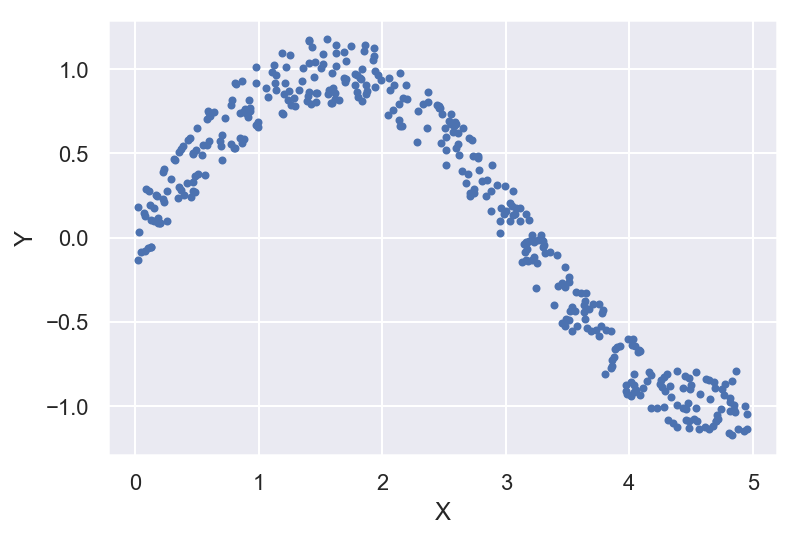

In [41]:
from IPython import display
from sklearn.externals.six import StringIO
import numpy as np
from matplotlib import pylab as plt
 
# Create a random dataset
rng = np.random.RandomState(42) # fix the seed so the result are stable
N_points = 400
X = np.sort(5 * rng.rand(N_points, 1), axis=0)
y = np.sin(X).ravel() + .4 * (0.5 - rng.rand(N_points))

plt.plot(X, y, 'b.')
plt.xlabel('Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



## Correlation 

Above, we saw how covariance could identify the degree to which two random variables tend to vary together while using a formulation that depends on the units of $X$ and $Y$ variables. During data analysis, covariance measure cannot be directly used in data comparison as different experiments may contain underlying data, measured in different units. For this, we need to normalize this degree of variation into a standard unit, with interpretable results independent of the units of data. We achieve this with a derived normalized measure, called correlation. 

Correlation is defined as covariance, normalized by the product of a standard deviation of $X$ and $Y$. This normalization helps us set the scale from -1 to 1. So the correlation between 𝑋 and Y can be calculated from different formulas one would be "Pearson's correlation coefficient," commonly called "the correlation coefficient" for **Population** which is calculated as:

$$Correlation(X,Y) = \frac{\sigma_{X,Y}}{\sigma_X\sigma_Y}$$

>When two random variables **Correlate**, this reflects that the change in one item **effects** the change in the values of the second variable. 

A correlation value of precisely 1.0 means there is a perfect positive relationship between the two variables. For a positive increase in one variable, there is also a positive increase in the second variable. A value of -1.0 means there is a perfect negative relationship between the two variables. This shows that the variables move in opposite directions - for a positive increase in one variable, there is a decrease in the second variable. 

In data science practice, we typically to look at correlation rather than covariance because it is more interpretable since it does not depend on the scale of either random variable involved.


### Use Cases


#### Social Media and Websites
Digital publishers want to maximize their understanding of the potential relationship between social media activity and visits to their website. For example, the digital publisher runs the correlation report between hourly Twitter mentions and visits for a two week period. The correlation is found to be r = 0.28, which indicates a medium, positive relationship between Twitter mentions and website visits.

#### Optimization for E-retailers
E-retailers are interested in driving increased revenue. For example, an e-retailer wants to compare a number of secondary success events (e.g., file downloads, product detail page views, internal search click-throughs, etc.) with weekly web revenue. They can quickly identify internal search click-throughs as having the highest correlation, which may indicate an area for optimization.

### Types of Correlation Measures

__Coefficient of correlation__, r, called the linear correlation coefficient, measures the strength and the direction of a linear relationship between two variables. As mentioned before also called as __Pearson correlation coefficient__. 

In statistics, we measure four types of correlations for detailed relationship analysis: 
* Pearson correlation
* Kendall Rank correlation 
* Spearman correlation
* Point-Biserial correlation. 


For now, we shall focus on the Pearson correlation as it is the go-to correlation measure for most needs. 

__Pearson r__ correlation is the most widely used correlation statistic to measure the degree of the relationship between two linearly related variables. For the __Pearson r__  there are some assumptions.
The assumptions are as follows: level of measurement, related pairs, absence of outliers, normality of variables, linearity, and homoscedasticity.

Level of measurement refers to each variable. For a Pearson correlation, each variable should be continuous.  If one or both of the variables are ordinal in measurement, then a Spearman correlation could be conducted instead.
Related pairs refer to the pairs of variables. Each participant or observation should have a pair of values. So if the correlation was between weight and height, then each observation used should have both a weight and a height value.
Absence of outliers refers to not having outliers in either variable. Having an outlier can skew the results of the correlation by pulling the line of best fit formed by the correlation too far in one direction or another.  Typically, an outlier is defined as a value that is 3.29 standard deviations from the mean, or a standardized value of less than ±3.29.
Linearity and homoscedasticity refer to the shape of the values formed by the scatterplot. For linearity, a “straight line” relationship between the variable should be formed.  If a line were to be drawn between all the dots going from left to right, the line should be straight and not curved.  Homoscedasticity refers to the distance between the points to that straight line. The shape of the scatterplot should be tube-like in shape. If the shape is cone-like, then homoskedasticity would not be met.



### Calculating Coefficient of Correlation (r)

Pearson Correlation (r) for **Sample** is calculated using following formula :

$$ r_{xy} = \frac{\sum_{i=1}^{n}(x_i -\bar{x})(y_i - \bar{y})} {\sqrt{(\sum_{i=1}^{n}x_i - \bar{x})^2 (\sum_{i=1}^{n}y_i-\bar{y})^2}}$$

So just like in the case of covariance,  $X$ and $Y$ are two random variables and we have a sample of n elements of each. 


$xi$ = ith element of variable $X$

$yi$ = ith element of variable $Y$

$n$ = number of data points (__$n$ must be same for $X$ and $Y$__)

$\bar{x}$ = mean of the sample of the independent variable $X$

$\bar{y}$ = mean of the sample of the dependent variable $Y$

$r_{xy}$ = Calculated Pearson Correlation


Here x and y are the random variables, $\bar{x}$ and $\bar{y}$ are the mean values for both x and y. A detailed mathematical insight into this equation is available [in this paper](http://www.hep.ph.ic.ac.uk/~hallg/UG_2015/Pearsons.pdf)

### Interpreting Correlation values

> __Correlation formula shown above always gives values in a range between -1 and 1__

If two variables have a correlation of +0.9,  this means the change in one item results in an almost similar change to another item. A correlation value of -0.9 means that the change is one variable results as an opposite change in the other variable. A Pearson correlation near 0 would be no effect. Here are some example of Pearson correlation calculations as scatter plots. 
![](pearson_2.png)

Think about stock markets in terms of correlation. All the stock market indexes tend to move together in similar directions. When the DOW Jones loses 5%, the S&P 500 usually loses around 5%. When the DOW Jones gains 5%, the S&P 500 usually gains around 5% because they are **positively correlated**.

On the other hand, there could also be negative correlation where you might observe that as the DOW Jones loses 5% of its value, Gold might gain 5%. Alternatively, if the Dow Jones gains 5% of its value, Gold may lose 5% of its value. That's **negative correlation**. 

For a better demonstration of Pearsons Correlation you can look at the picture below. 

<img src="images/covariance.gif" width=500>

**It it also worth mentioning again that Pearson Correlation equal to zero DOSE NOT indicate that there is no relation ship between two variables. INDICATES that there is no LINEAR relationship between two variables**

### So how do these measures relate to each other?

Are Covariance and Correlation The Same Thing? Simply put, no.

While both covariance and correlation indicate whether variables are positively or negatively related to each other, they are not considered to be the same. This is because correlation also informs about the degree to which the variables tend to move together. 

Covariance is used to measure variables that have different units of measurement. By leveraging covariance, analysts are able to determine whether units are increasing or decreasing, but they are unable to solidify the degree to which the variables are moving together since covariance does not use one standardized unit of measurement.

Correlation, on the other hand, standardizes the measure of interdependence between two variables and informs researchers as to how closely the two variables move together.

## Summary
In this lesson, we looked at Identifying the variance of random variables as a measure of mean deviation. We saw how this measure can be used to first calculate covariance, followed by the correlation to analyze how to change variable effects the change of another variable. Next, we shall see how we can use correlation analysis to run a __regression analysis__ and later, how covariance calculation helps us with dimensionality reduction. 